In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [41]:


data = pd.read_csv('Preparados.csv')



 Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento.

In [42]:
data.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','PSA','FIEBRE'],inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 34 columns):
 #   Column                                                                                                 Non-Null Count  Dtype
---  ------                                                                                                 --------------  -----
 0   EDAD                                                                                                   562 non-null    int64
 1   DIABETES                                                                                               562 non-null    int64
 2   VOLUMEN PROSTATICO                                                                                     562 non-null    int64
 3   CUP                                                                                                    562 non-null    int64
 4   ENF. CRONICA PULMONAR OBSTRUCTIVA                                                                      562 non

In [44]:
y = data["HOSPITALIZACION"] # declaramos la columna etiqueta

# Elimina la columna del DataFrame original

data.drop(columns=["HOSPITALIZACION"], inplace=True)

# asignamos a X los valores restantes para entrenar

X = data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [46]:
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

In [47]:
tree = clf.fit(X_train,y_train)
tree

DecisionTreeClassifier(max_depth=5, random_state=42)

In [48]:
evaluacion = tree.predict(X_test)
    
score = accuracy_score(evaluacion,y_test)

score

0.9763313609467456

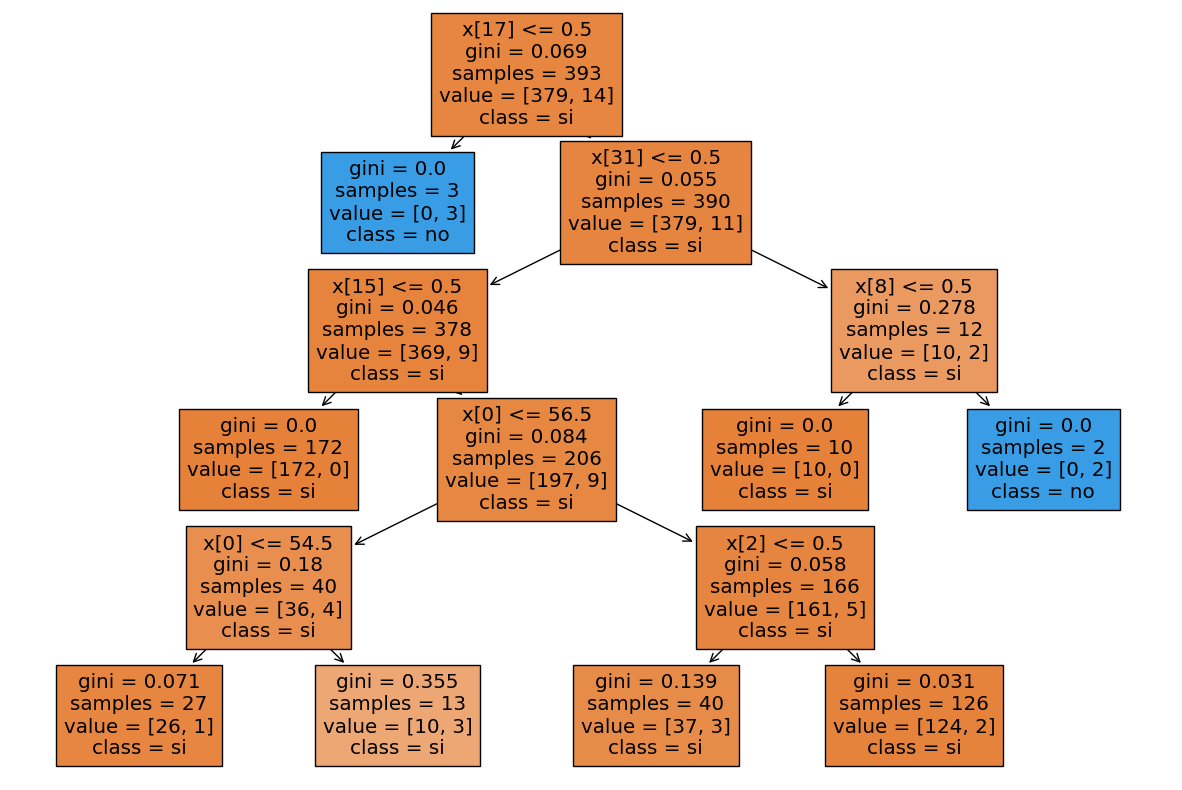

In [52]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus preferencias
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=None, class_names=['si','no'])  # Puedes proporcionar nombres de características y clases si es necesario
plt.show()

In [51]:
parametros = {'max_depth':range(25),'random_state' : 42}